In [9]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [11]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [12]:
from citipy import citipy

In [13]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [14]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [15]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a87bfa8e1555a2fde65f9c3126de0bab


In [16]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [18]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | dingle
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | tairua
Processing Record 5 of Set 1 | tema
Processing Record 6 of Set 1 | petropavlovka
Processing Record 7 of Set 1 | alotau
City not found. Skipping...
Processing Record 8 of Set 1 | dunedin
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | souillac
Processing Record 12 of Set 1 | caucasia
Processing Record 13 of Set 1 | oriximina
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | new norfolk
Processing Record 16 of Set 1 | sinnamary
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | klaksvik
Processing Record 19 of Set 1 | atambua
Processing Record 20 of Set 1 | venice
Processing Record 21 of Set 1 | rach gia
Processing Record 22 of Set 1 | chapais
Processing Record 23 of S

Processing Record 38 of Set 4 | manadhoo
Processing Record 39 of Set 4 | humaita
Processing Record 40 of Set 4 | nhulunbuy
Processing Record 41 of Set 4 | gangotri
City not found. Skipping...
Processing Record 42 of Set 4 | makakilo city
Processing Record 43 of Set 4 | cabo san lucas
Processing Record 44 of Set 4 | longyearbyen
Processing Record 45 of Set 4 | saskylakh
Processing Record 46 of Set 4 | redmond
Processing Record 47 of Set 4 | acari
Processing Record 48 of Set 4 | ribeira grande
Processing Record 49 of Set 4 | kuytun
Processing Record 50 of Set 4 | dukat
Processing Record 1 of Set 5 | hofn
Processing Record 2 of Set 5 | carnarvon
Processing Record 3 of Set 5 | tiksi
Processing Record 4 of Set 5 | chicama
Processing Record 5 of Set 5 | mayo
Processing Record 6 of Set 5 | vila velha
Processing Record 7 of Set 5 | salalah
Processing Record 8 of Set 5 | hope
Processing Record 9 of Set 5 | yumen
Processing Record 10 of Set 5 | tabas
Processing Record 11 of Set 5 | novyy urengoy

Processing Record 28 of Set 8 | nishihara
Processing Record 29 of Set 8 | marcona
City not found. Skipping...
Processing Record 30 of Set 8 | harindanga
Processing Record 31 of Set 8 | kushiro
Processing Record 32 of Set 8 | vila franca do campo
Processing Record 33 of Set 8 | qafsah
City not found. Skipping...
Processing Record 34 of Set 8 | ixtapa
Processing Record 35 of Set 8 | xiongshi
City not found. Skipping...
Processing Record 36 of Set 8 | muros
Processing Record 37 of Set 8 | zhezkazgan
Processing Record 38 of Set 8 | sao filipe
Processing Record 39 of Set 8 | hatillo
Processing Record 40 of Set 8 | ust-maya
Processing Record 41 of Set 8 | sydney mines
Processing Record 42 of Set 8 | acapulco
Processing Record 43 of Set 8 | juneau
Processing Record 44 of Set 8 | sakakah
Processing Record 45 of Set 8 | quelimane
Processing Record 46 of Set 8 | eureka
Processing Record 47 of Set 8 | kununurra
Processing Record 48 of Set 8 | pisco
Processing Record 49 of Set 8 | koson
Processing

KeyboardInterrupt: 

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,42.46,70,40,28.77,AR,2022-04-16 02:33:31
1,Dingle,10.9995,122.6711,85.15,69,20,4.94,PH,2022-04-16 02:33:31
2,Rikitea,-23.1203,-134.9692,77.81,72,2,14.56,PF,2022-04-16 02:32:33
3,Tairua,-37.0167,175.8500,68.59,73,86,9.75,NZ,2022-04-16 02:33:32
4,Tema,5.6670,-0.0166,81.48,76,64,7.63,GH,2022-04-16 02:33:32
5,Petropavlovka,50.6114,105.3196,49.44,35,100,5.79,RU,2022-04-16 02:33:32
6,Dunedin,-45.8742,170.5036,58.46,49,1,23.60,NZ,2022-04-16 02:31:45
7,Lebu,-37.6167,-73.6500,52.03,91,7,12.19,CL,2022-04-16 02:30:47
8,Butaritari,3.0707,172.7902,81.81,73,39,10.76,KI,2022-04-16 02:33:33
9,Souillac,-20.5167,57.5167,77.38,78,75,14.97,MU,2022-04-16 02:33:33


In [27]:
new_column_order = ["City","Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-04-16 02:33:31,-54.8000,-68.3000,42.46,70,40,28.77
1,Dingle,PH,2022-04-16 02:33:31,10.9995,122.6711,85.15,69,20,4.94
2,Rikitea,PF,2022-04-16 02:32:33,-23.1203,-134.9692,77.81,72,2,14.56
3,Tairua,NZ,2022-04-16 02:33:32,-37.0167,175.8500,68.59,73,86,9.75
4,Tema,GH,2022-04-16 02:33:32,5.6670,-0.0166,81.48,76,64,7.63
...,...,...,...,...,...,...,...,...,...
503,Birr,IE,2022-04-16 02:46:02,53.0914,-7.9133,45.21,94,99,6.49
504,Rovaniemi,FI,2022-04-16 02:46:03,66.5000,25.7167,27.81,68,0,3.44
505,Khani,GE,2022-04-16 02:46:03,41.9563,42.9566,31.57,80,15,5.10
506,Ostersund,SE,2022-04-16 02:46:04,63.1792,14.6357,36.05,75,100,8.05


In [29]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [31]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

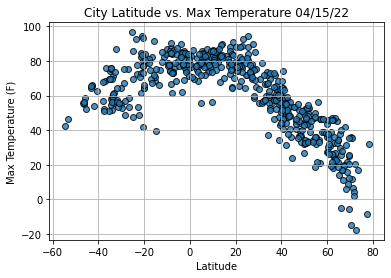

In [32]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

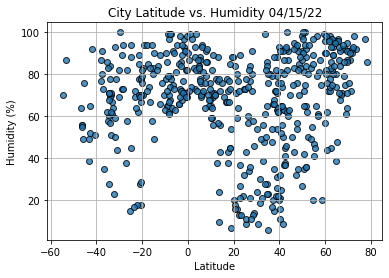

In [33]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

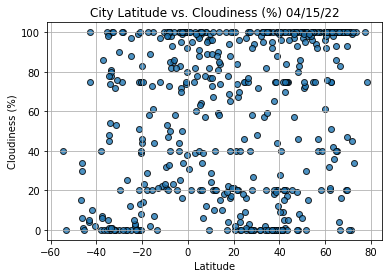

In [34]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

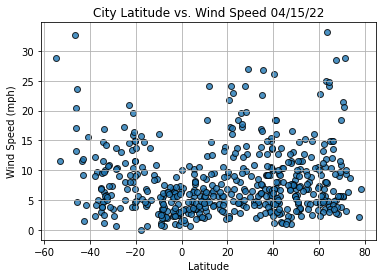

In [35]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

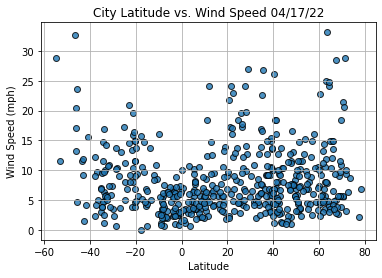

In [36]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()